In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Esercizio 4.1**

Leggiamo il dataset Titanic.

In [80]:
titanic = sns.load_dataset('titanic')

Mostriamo come si distribuisce l'età in base al sesso. Per farlo, usiamo la funzione `displot()` di Seaborn.

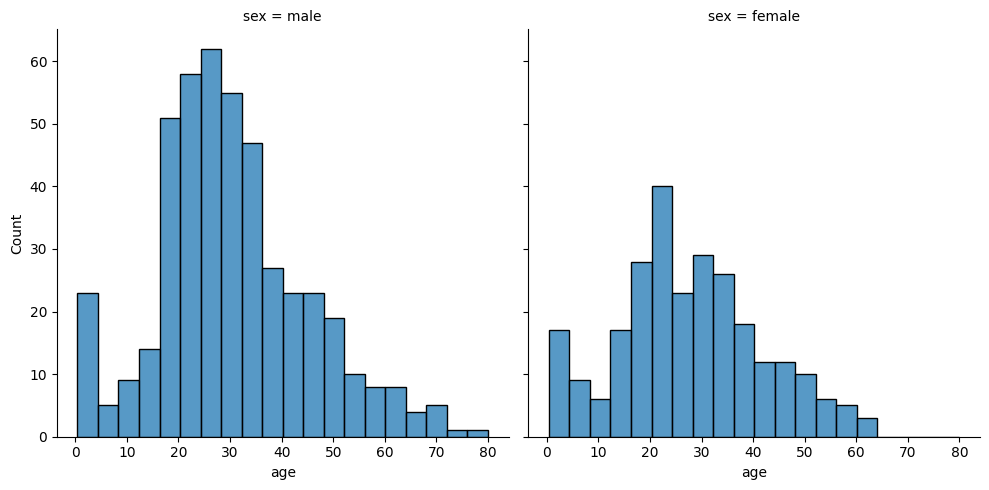

In [81]:
sns.displot(
    data=titanic,
    x='age',
    col='sex')

plt.show()

Vediamo ora come si distribuisce il rapporto tra età e numero di familiari, sempre in base al genere.

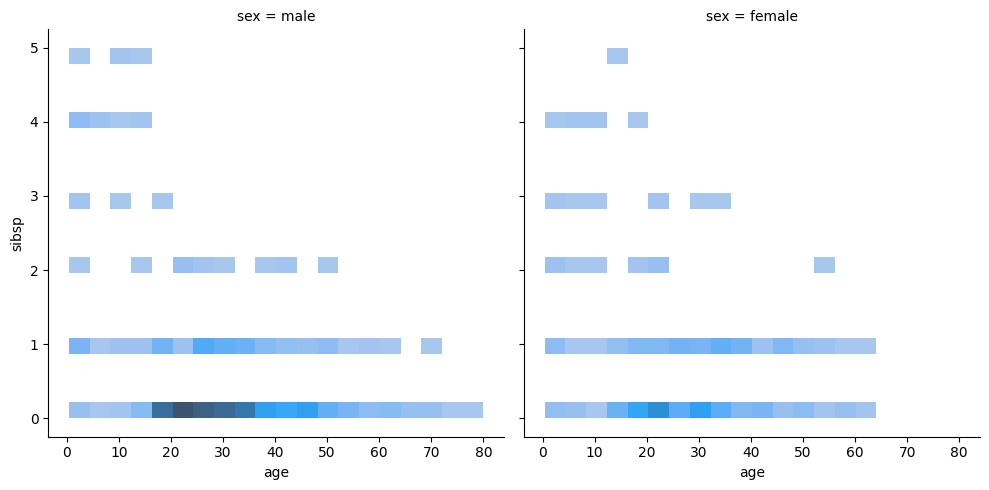

In [82]:
sns.displot(
    data=titanic,
    x='age',
    y='sibsp',
    col='sex')

plt.show()

**Esercizio 4.2**

Supponiamo di porci le seguenti domande, e progettare di conseguenza l'EDA.

1. Quante famiglie si sono imbarcate? E quante persone sole?
2. Quale era l'età media dei deceduti?
3. Quale classe di passeggeri ha visto più deceduti?

Partiamo valutando se ci sono feature molto correlate tra loro.

<Axes: >

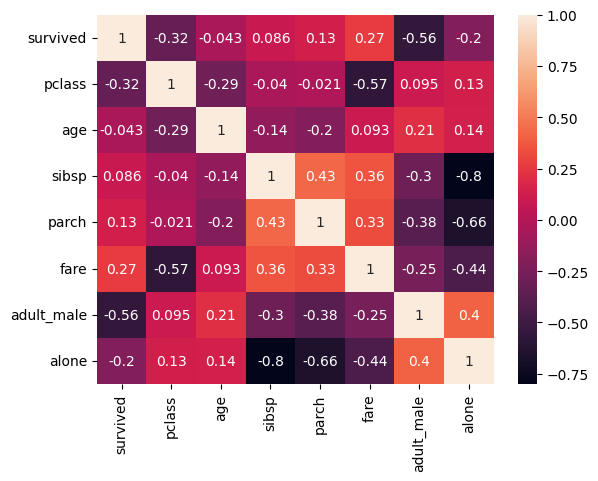

In [83]:
sns.heatmap(titanic.corr(method='kendall', numeric_only=True), annot=True)

Notiamo che:

* `pclass` è abbastanza anticorrelata a `fare`. In altre parole, più è alta (numericamente) la classe di un passeggero, minore è la tariffa pagata.
* `adult_male` è abbastanza anticorrelata a `survived`. Ciò implica che ci attendiamo che la maggior parte dei morti siano uomini adulti.
* `sibsp` è fortemente anticorrelata ad `alone`. Stesso dicasi per `parch`.

Rispondiamo adesso alla prima domanda.

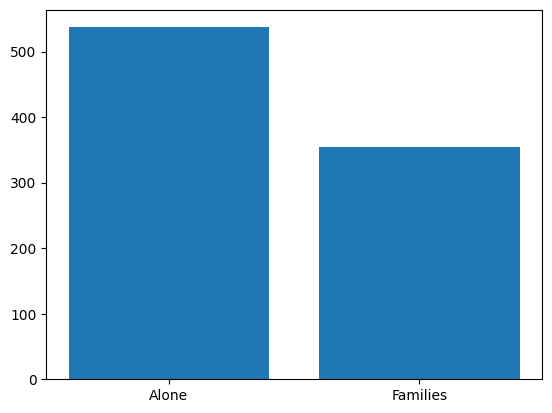

In [84]:
alones = pd.value_counts(titanic['alone'])

xticks = np.arange(2)

fig, ax = plt.subplots()

ax.bar(xticks, alones.values)
ax.set_xticks(xticks)
ax.set_xticklabels(['Alone', 'Families'])

plt.show()

Valutiamo adesso l'età media dei deceduti.

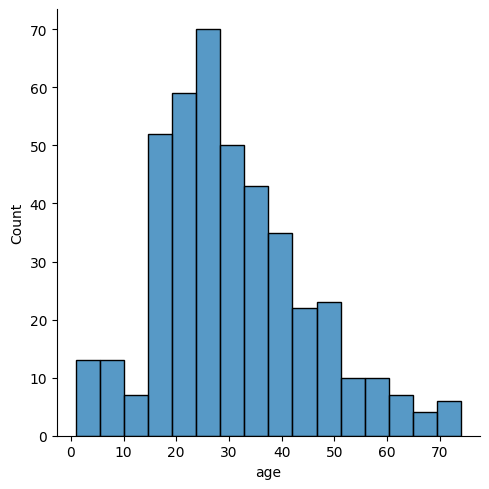

Età media dei sopravvissuti: 30.63 anni


In [85]:
survived = titanic[titanic['survived'] == 0]

sns.displot(
    data=survived,
    x='age')
plt.show()

ma = np.round(survived['age'].mean(), 2)
print(f'Età media dei sopravvissuti: {ma} anni')

Vediamo infine qual è la classe di passeggeri con il maggior numero di deceduti.

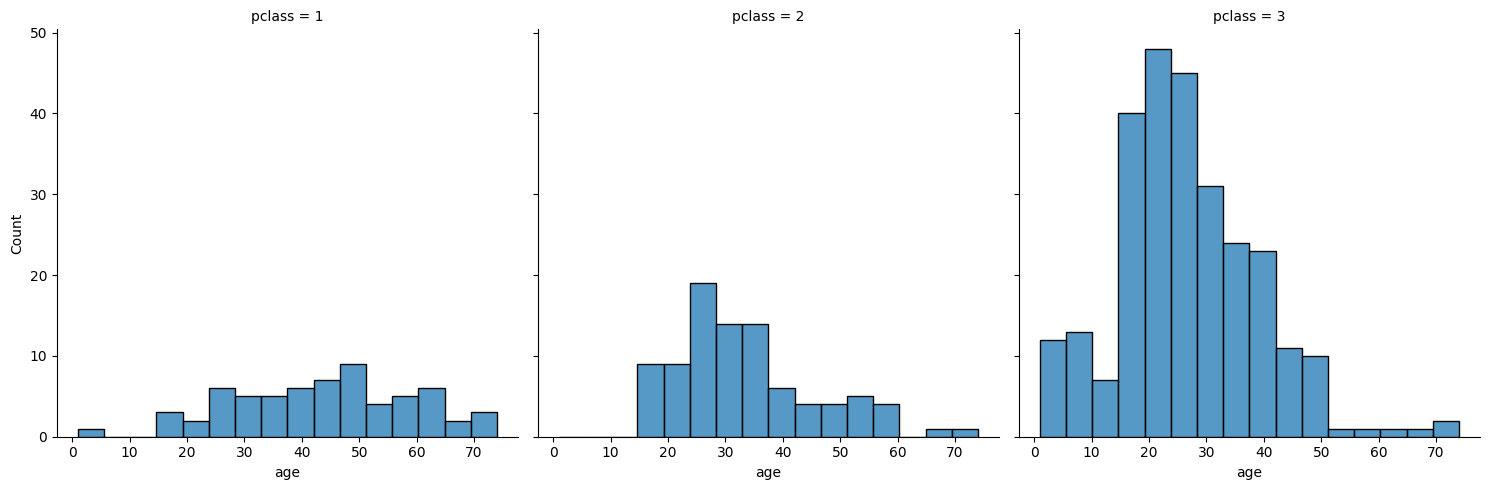

In [86]:
sns.displot(
    data=survived,
    x='age',
    col='pclass')

plt.show()

Dalla precedente, sembra che la classe con il maggior numero di passeggeri deceduti sia la terza. Confermiamolo.

In [87]:
max_surv_cls = survived['pclass'].value_counts().idxmax()
print(f'La classe con il maggior numero di sopravvissuti è la {max_surv_cls}')

La classe con il maggior numero di sopravvissuti è la 3


**Esercizio 4.3**

Supponiamo di porci le seguenti domande, e progettare di conseguenza l'EDA.

1. Quale è il momento in cui è meglio servire un tavolo?
2. Quale è il tavolo "giusto" da servire?
3. Che relazione c'è tra conto e mancia?

Partiamo caricando il dataset tips, e visualizzandone la struttura.

In [88]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Per valutare il momento giusto in cui servire un tavolo, andiamo a visualizzare la distribuzione delle mance sulla base del giorno e del tempo.

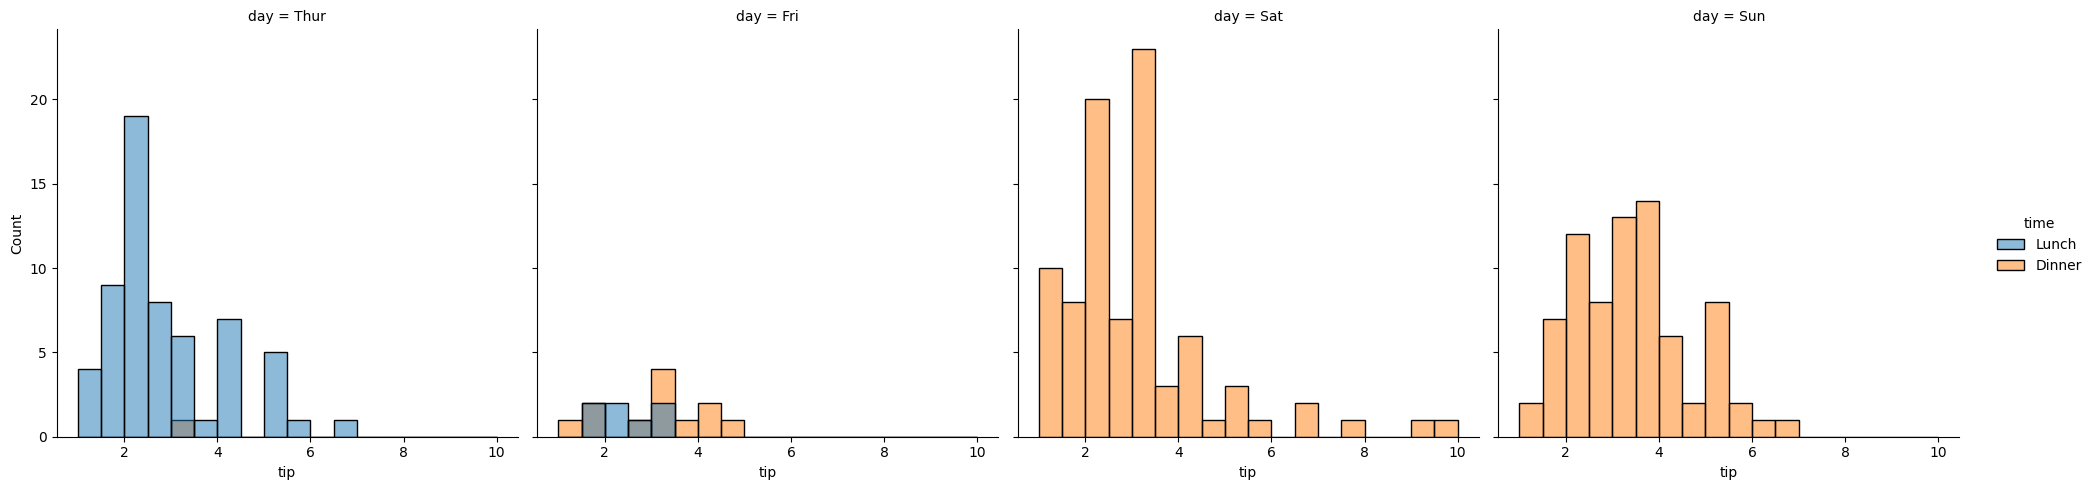

In [90]:
sns.displot(
    data=tips,
    x='tip',
    col='day',
    hue='time')

plt.show()

Notiamo che:

* le mance sono di entità molto ridotta il venerdì;
* aumentano considerevolmente (in termini di quantità) sia il giovedì a pranzo, sia il sabato a cena.

Valutiamo la mancia media in questi due ultimi intervalli temporali:

In [99]:
tm_t_l = tips[(tips['day'] == 'Thur') & (tips['time'] == 'Lunch')]
tm_s_d = tips[(tips['day'] == 'Sat') & (tips['time'] == 'Dinner')]

avg_tm_t_l = np.round(tm_t_l['total_bill'].mean(), 2)
avg_tm_s_d = np.round(tm_s_d['total_bill'].mean(), 2)
print(f'Mancia media giovedì a pranzo: {avg_tm_t_l} $')
print(f'Mancia media sabato a cena: {avg_tm_s_d} $')

Mancia media giovedì a pranzo: 17.66 $
Mancia media sabato a cena: 20.44 $


Per capire quale sia il tavolo giusto da servire, focalizziamoci sui tavoli con le mance maggiori date di sabato sera.

In [114]:
wanted_tip = tm_s_d.describe().loc['75%', 'tip']
pay_well = tm_s_d[tm_s_d['tip'] > wanted_tip]

s_pay_well = pay_well['sex'].mode()[0]
m_pay_well = pay_well['smoker'].mode()[0]
d_pay_well = pay_well['size'].mode()[0]

print(f'Il miglior tavolo da servire ha: \nPagante {s_pay_well}\nFumatore {m_pay_well}\nNumero astanti {d_pay_well}')

Per visualizzare la relazione tra conto e mancia, possiamo fare un'analisi di correlazione:

<Axes: >

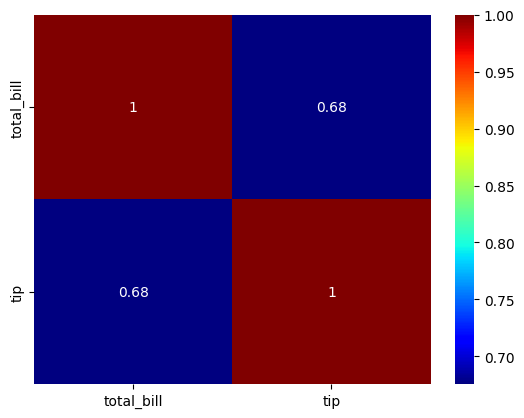

In [122]:
corr_an = tips[['total_bill', 'tip']]
sns.heatmap(corr_an.corr(numeric_only=True), annot=True, cmap='jet')